In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/Users/garretthayden/Library/CloudStorage/OneDrive-Colostate/Personal Projects/CardioGoodFitness.csv")

In [9]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [10]:
df.shape

(180, 9)

In [11]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [12]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [15]:
df.describe(include=("O")).T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [16]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


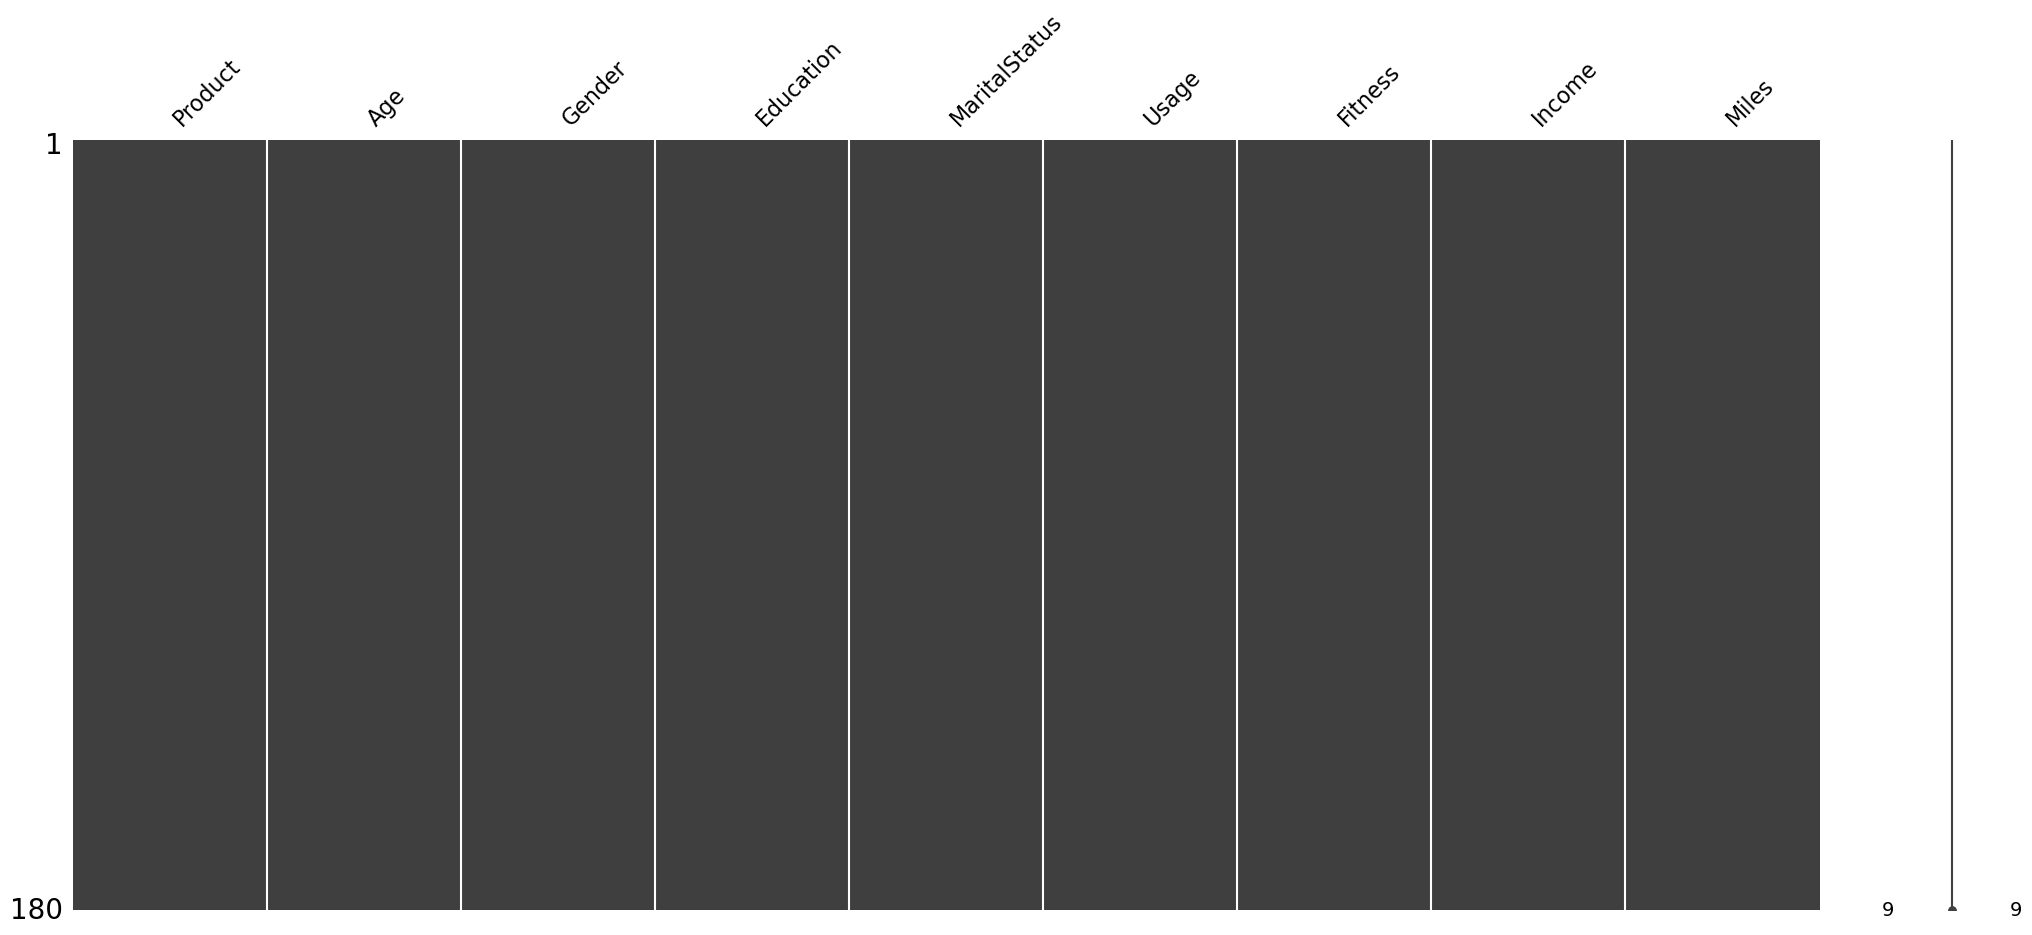

In [17]:
msn.matrix(df)
plt.show()

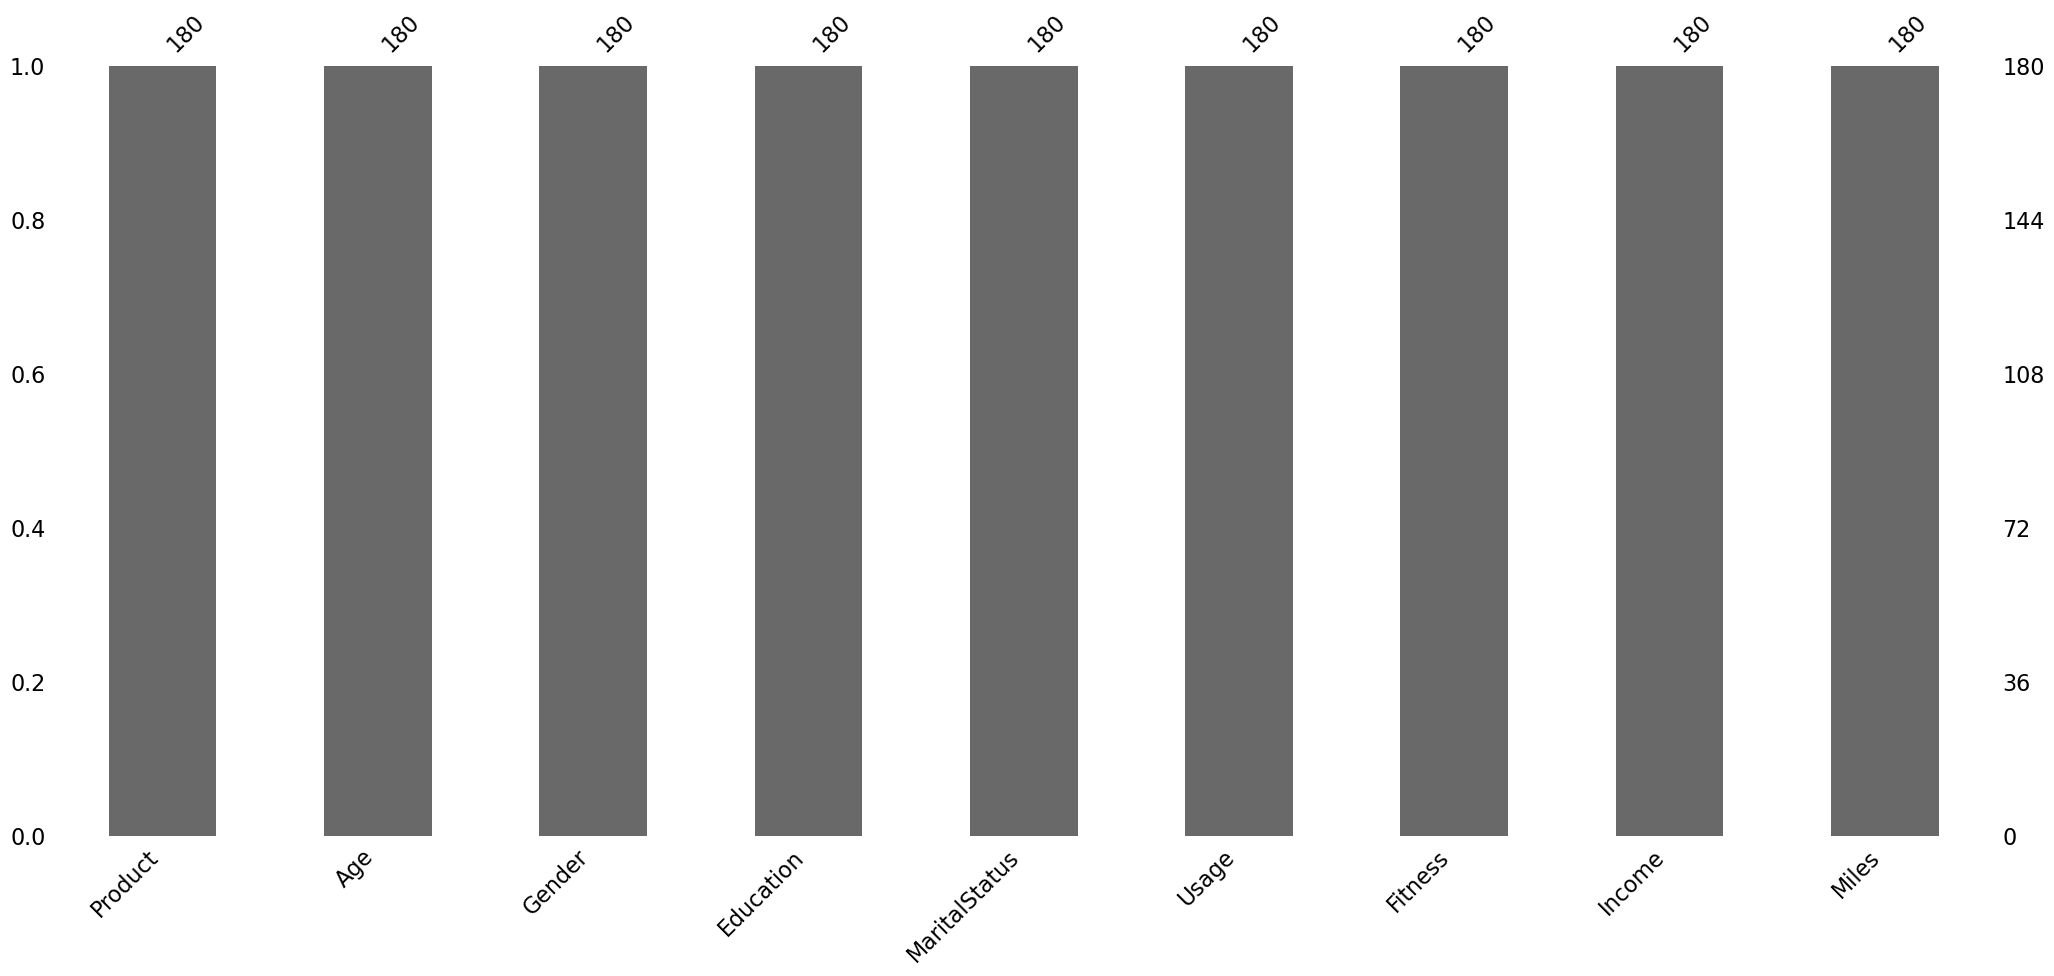

In [18]:
msn.bar(df)
plt.show()

In [22]:
df_null  = df.isnull().sum()

In [23]:
df_null.sum()

0

In [24]:
df.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [25]:
df.Gender.value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

<Axes: >

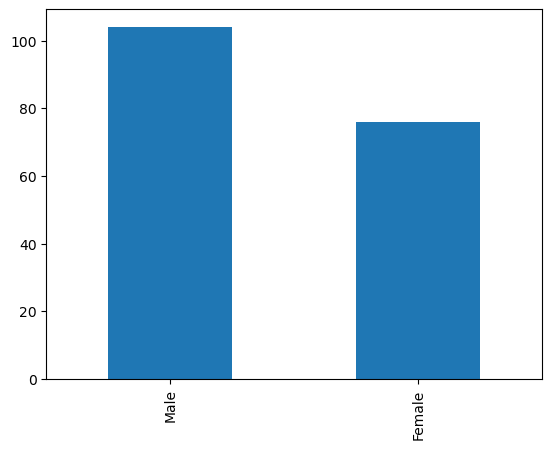

In [26]:
df.Gender.value_counts().plot.bar()

<function matplotlib.pyplot.show(close=None, block=None)>

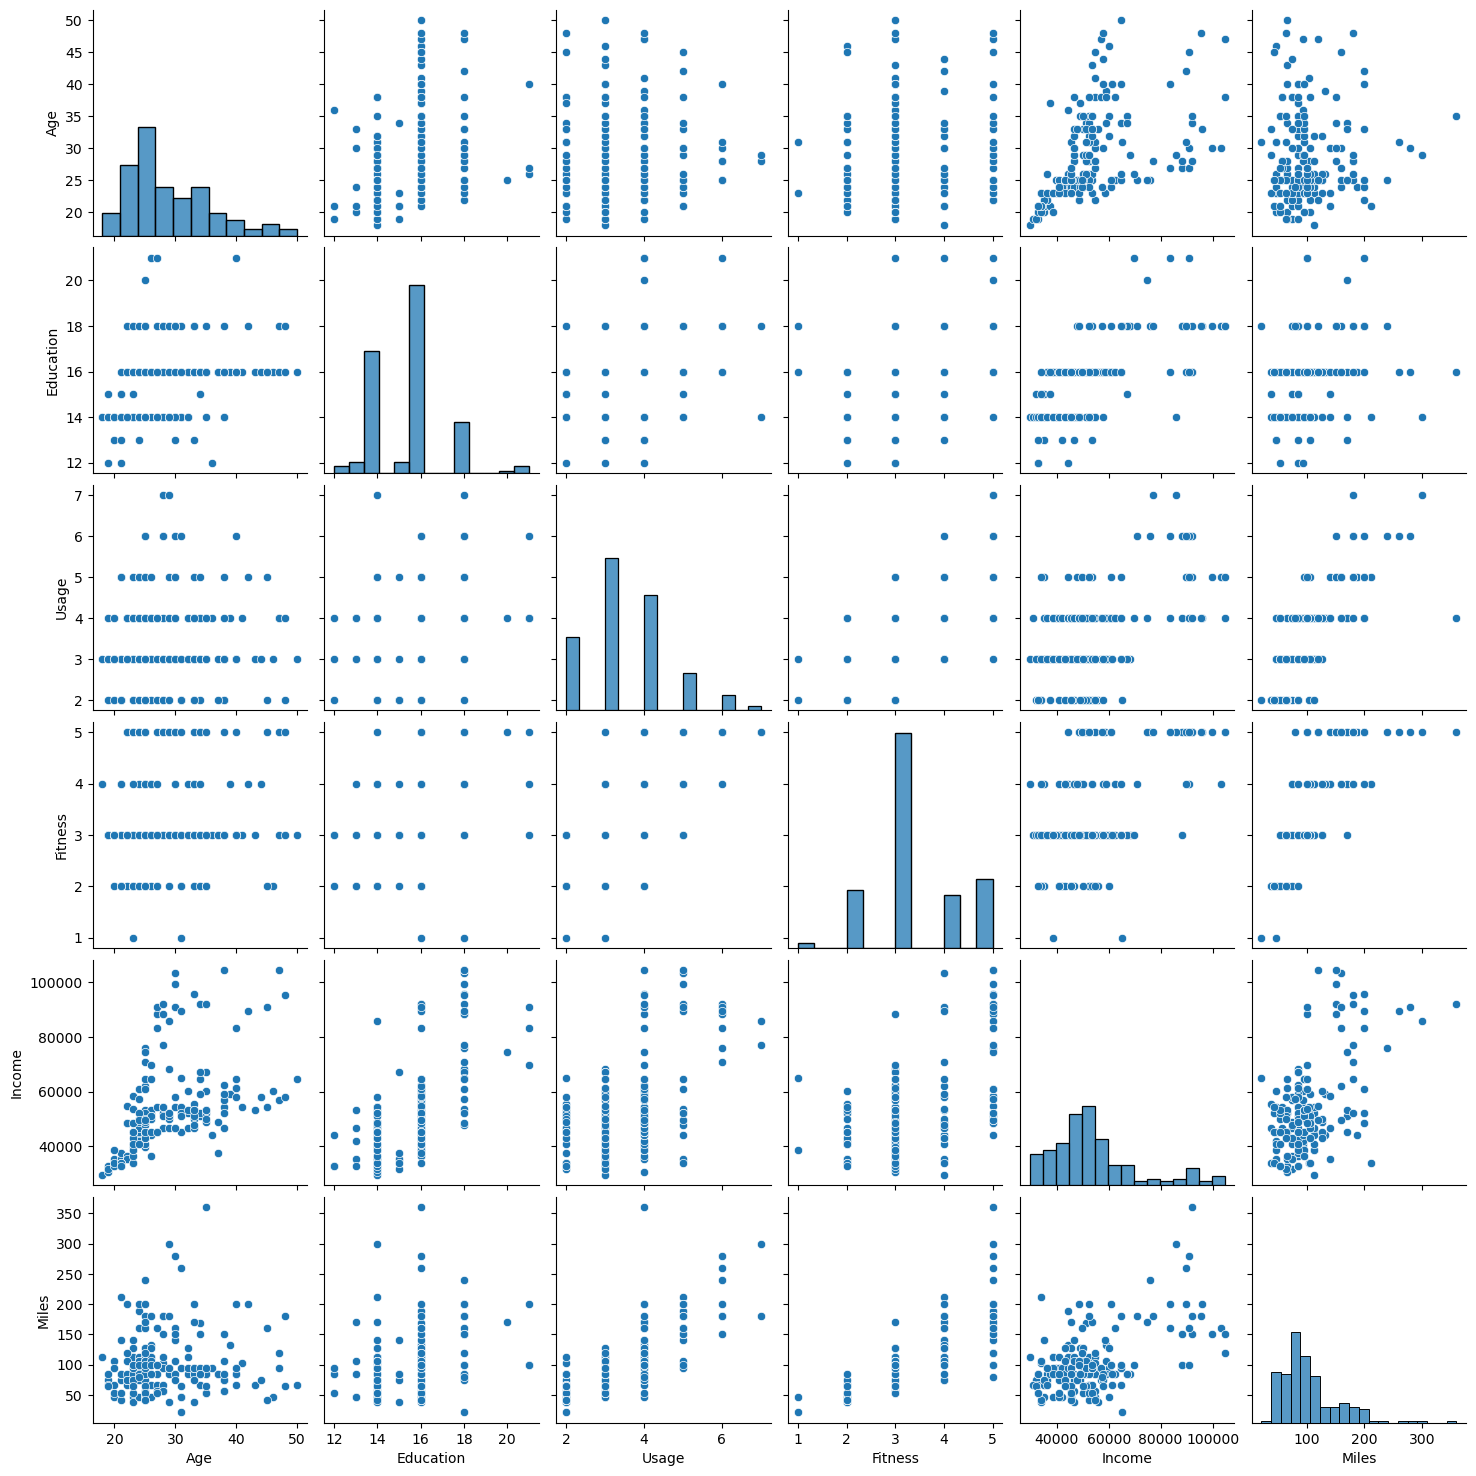

In [27]:
sns.pairplot(df)
plt.show

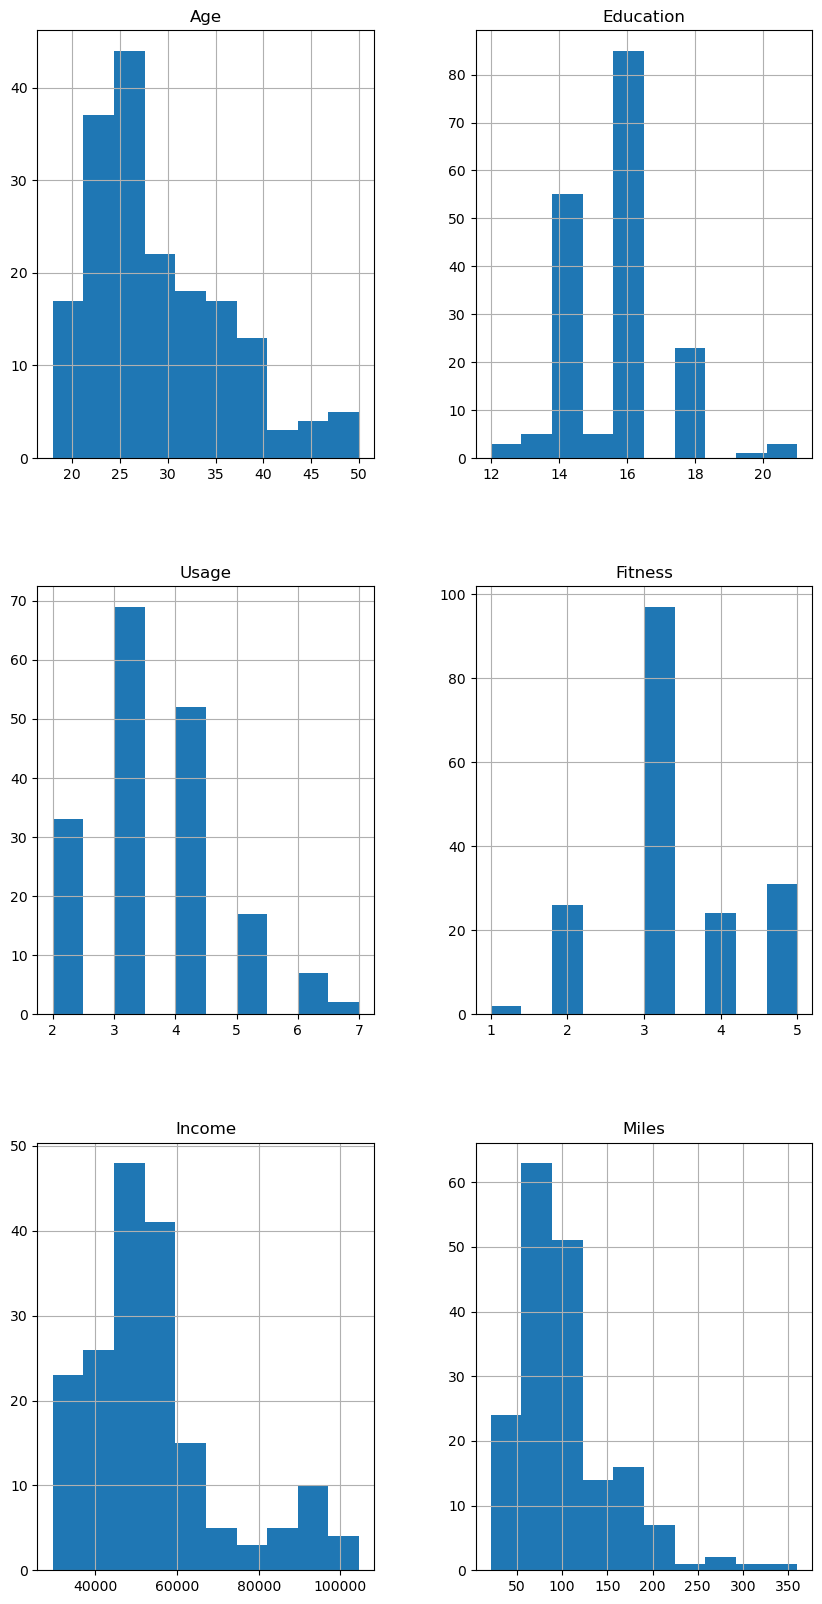

In [28]:
df.hist(figsize=(10,20))
plt.show()

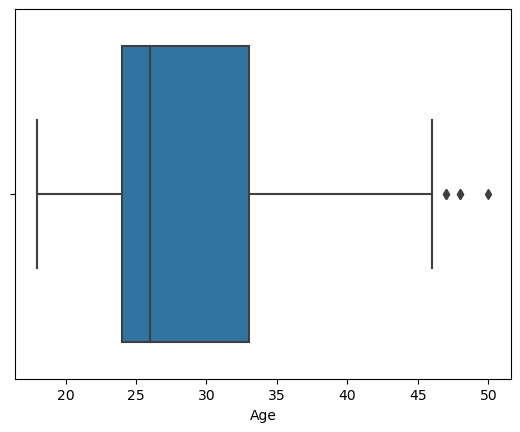

In [29]:
sns.boxplot(x="Age", data = df)
plt.show()

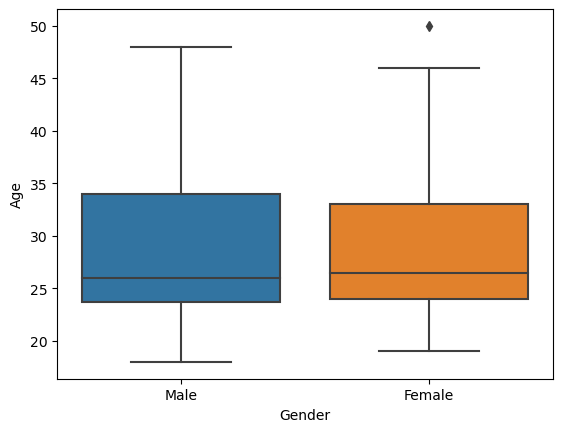

In [30]:
sns.boxplot(x="Gender", y ="Age", data = df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

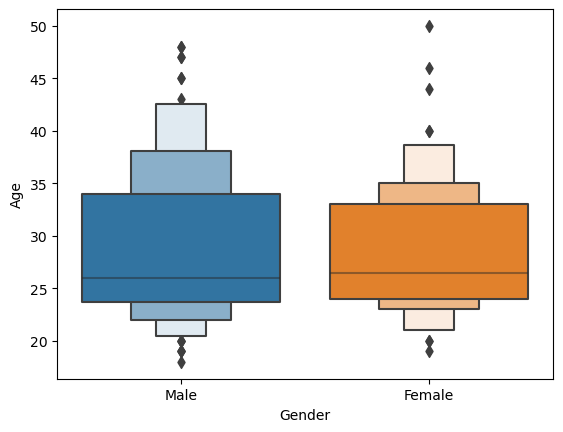

In [31]:
sns.boxenplot(x="Gender", y = "Age", data = df)
plt.show

In [32]:
pd.crosstab(df['Product'], df["Gender"])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


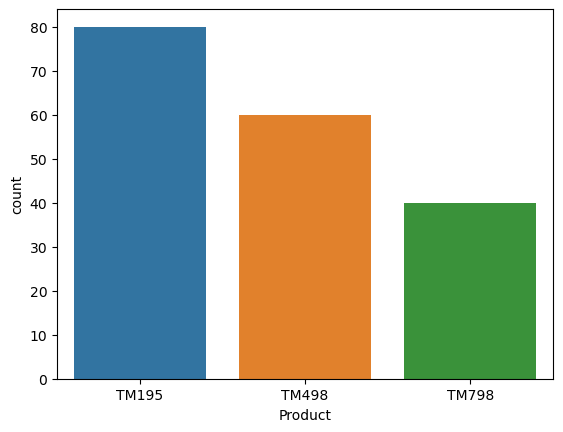

In [33]:
sns.countplot(x="Product", data = df)
plt.show()

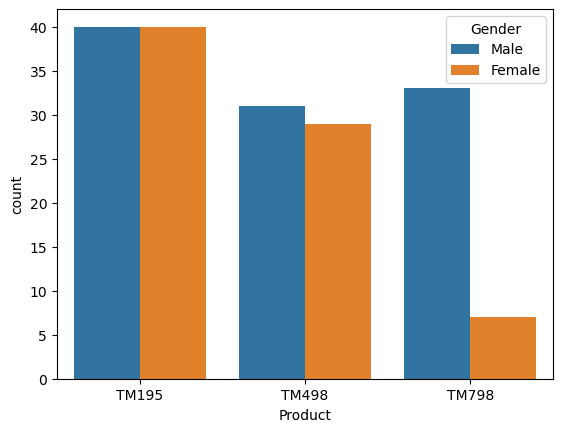

In [34]:
sns.countplot(x='Product', hue ='Gender', data=df)
plt.show()

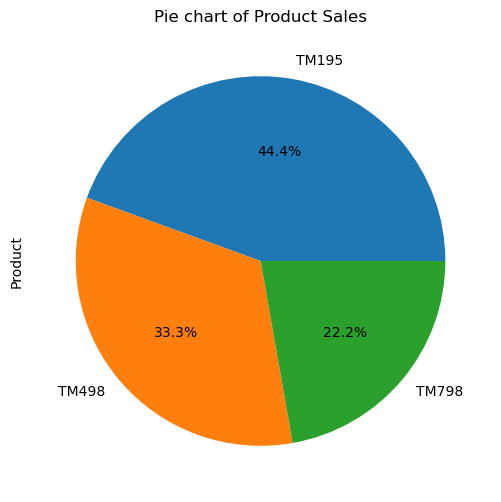

In [35]:
plt.figure(figsize=(8,6))
df['Product'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pie chart of Product Sales")
plt.show()


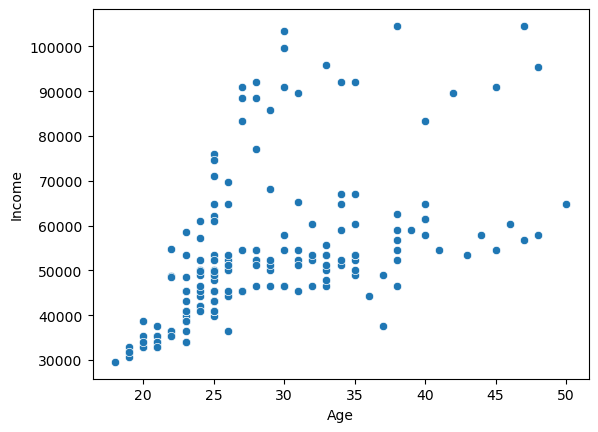

In [36]:
sns.scatterplot(x='Age', y="Income", data = df)
plt.show()

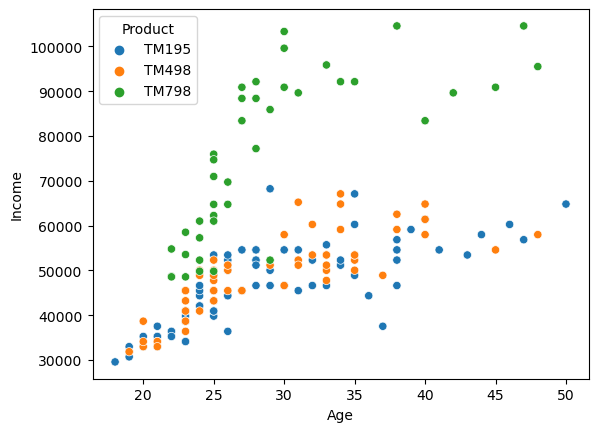

In [37]:
sns.scatterplot(x="Age", y="Income", data = df, hue = "Product")
plt.show()

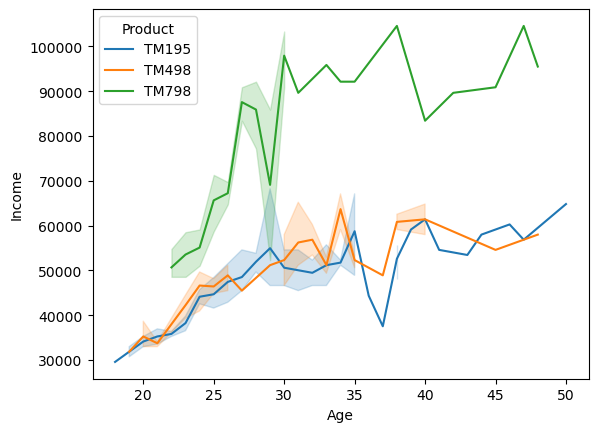

In [38]:
sns.lineplot(data=df, x="Age", y="Income", hue = "Product")
plt.show()

In [41]:
pd.pivot_table(df, "Income", index = ['Product', "Gender"],
               columns = [ 'MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

In [42]:
print(f"mean: {df['Age'].mean()}\nMedian: {df['Age'].median()}\nMode: {df['Age'].mode()[0]}")

mean: 28.788888888888888
Median: 26.0
Mode: 25


In [43]:
print(f"Variance: {df['Age'].var()}\nStd: {df['Age'].std()}")

Variance: 48.21216635630043
Std: 6.943498135399795


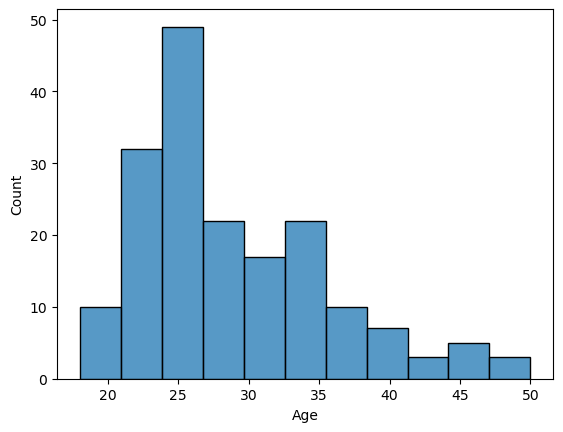

In [44]:
sns.histplot(df['Age'])
plt.show()

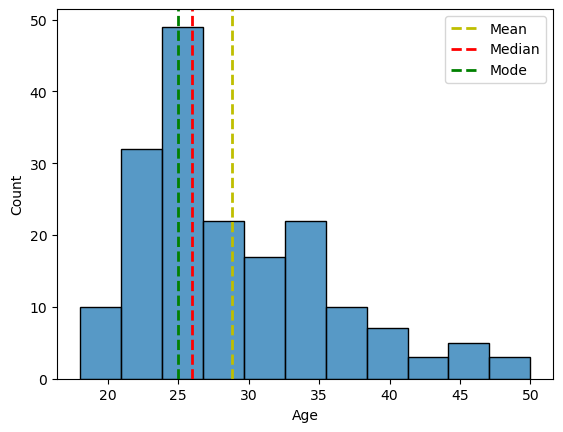

In [46]:
sns.histplot(df['Age'])
plt.axvline(df['Age'].mean(), color = "y", linestyle = '--', linewidth=2, label = "Mean")
plt.axvline(df["Age"].median(), color ='r', linestyle = "--", linewidth = 2, label = "Median")
plt.axvline(df['Age'].mode()[0], color='g', linestyle='--',linewidth=2, label='Mode')
plt.legend()
plt.show()

In [47]:
corr = df.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [49]:
max(corr)

'Usage'

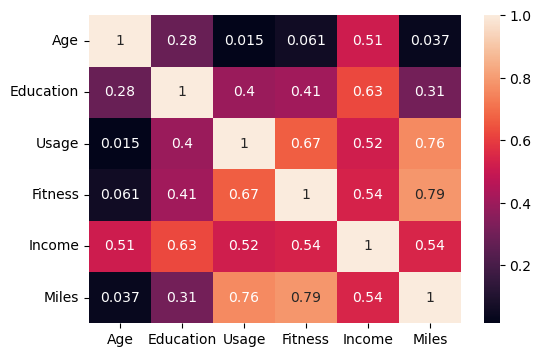

In [50]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True)
plt.show()